In [2]:
# Load Function Definitions 

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

font = {'size'   : 8}
matplotlib.rc('font', **font)

from pro_plot import Dendrogram
from standards import *

DataPath = "CA-diversity"
OutPath = "Graphs"

## n-Grams Entropy

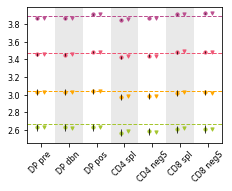

In [16]:
figsize = ( 3.5, 2.5 )

num_VEC = [1,2,3,4]
color_VEC = ["#bc5090", "#ef5675", "#ffa600","#a5c630"]
ShowError = True

# if correction is computed
corr_file = f'{DataPath}/synth_error-correction.csv'
corr_df = pd.read_csv( corr_file, index_col=0 )

Labels = [ CC_to_HEAD[cc] for cc in CC_VEC ]

fig, ax = plt.subplots( figsize=figsize )
ax.set_xticks( 1 + np.arange( len( Labels ) ) )
ax.set_xticklabels( Labels, rotation=45 )
ax.set_xlim( [0.5, len(Labels)+0.5] )    

for num, color in zip(num_VEC, color_VEC) :  

    INPATH = f"{DataPath}/nsb{num}g" 

    df_pre = pd.read_csv( f"{INPATH}-pre.csv", index_col=0 )
    df_pre[['NSB','stdDev']] = df_pre[['NSB','stdDev']] / num
    
    df_dat = pd.read_csv( f"{INPATH}-data.csv", index_col=0 ).loc[Labels]
    df_dat['NSB'] = ( df_dat['NSB'] - 0.5 * corr_df[f'n{num}-corr'] ) / num
    df_dat['stdDev'] = 0.5 * corr_df[f'n{num}-corr'] / num
    
    df_sim = pd.read_csv( f"{INPATH}-post.csv", index_col=0 ).loc[Labels]
    df_sim[['NSB','stdDev']] = df_sim[['NSB','stdDev']] / num
      
    #  pre  #
    df = df_pre
    x = np.linspace(0.5, len(Labels)+0.5)
    ax.axhline( y = df["NSB"][0], ls="--", lw=1, color=color, label=r"$P_{gen}$", zorder = -1 )

    #  data  #
    df = df_dat.reindex(Labels)
    x = 1 + np.arange( len( Labels ) ) - 0.125 
    ax.scatter(x, df["NSB"], color=color, marker='o', s=10, zorder=1, label=f"data $(n={num})$")
    if ShowError is True :
        ax.errorbar(x, df["NSB"], yerr=df["stdDev"], ls = "", lw=0.75, zorder=2, color='black', fmt='')

    #  simulation  #
    df = df_sim.reindex(Labels)
    x = 1 + np.arange( len( Labels ) ) + 0.125         
    ax.scatter(x, df["NSB"], color=color, marker='v', s=10, label=f"sim $(n={num})$")

# background grey columns
for i in np.arange( 1.5, ax.get_xlim()[1]-1, 2 ) :
    ax.axvspan( i, i+1, 0, 1, alpha=0.5, color=GREYS_DIC['silver'], ec=None, zorder=-10)

plt.savefig( f"{OutPath}/fig4B.pdf", bbox_inches='tight', dpi=300) 

## n-Grams Jensen-Shannon Dendrogram

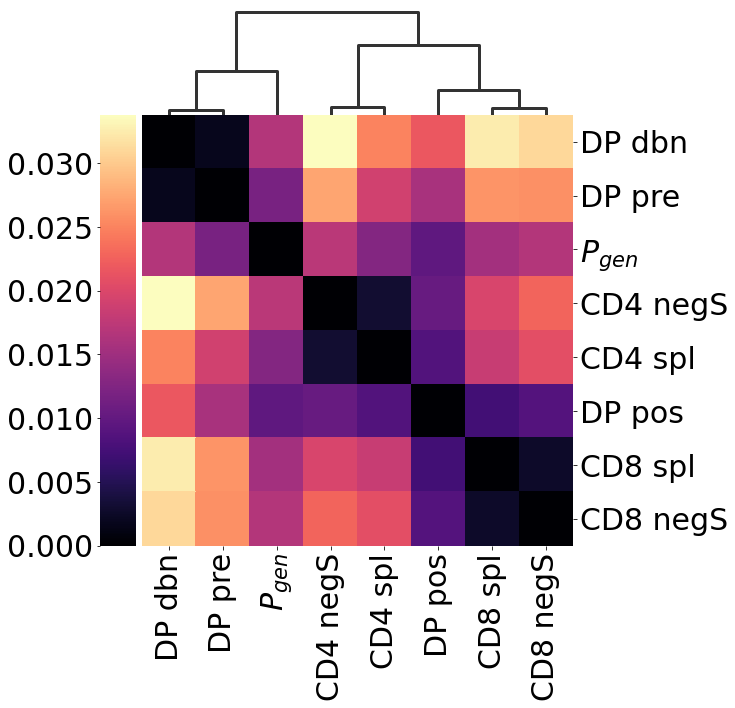

In [3]:
df = pd.read_csv(f"{DataPath}/CA-JS_postSTAT-nsb3g.csv", index_col=0)
Dendrogram( df )
plt.savefig(f"{OutPath}/fig4C.pdf", bbox_inches='tight', dpi=300)

## Pstage jensen-Shannon Dendrogram

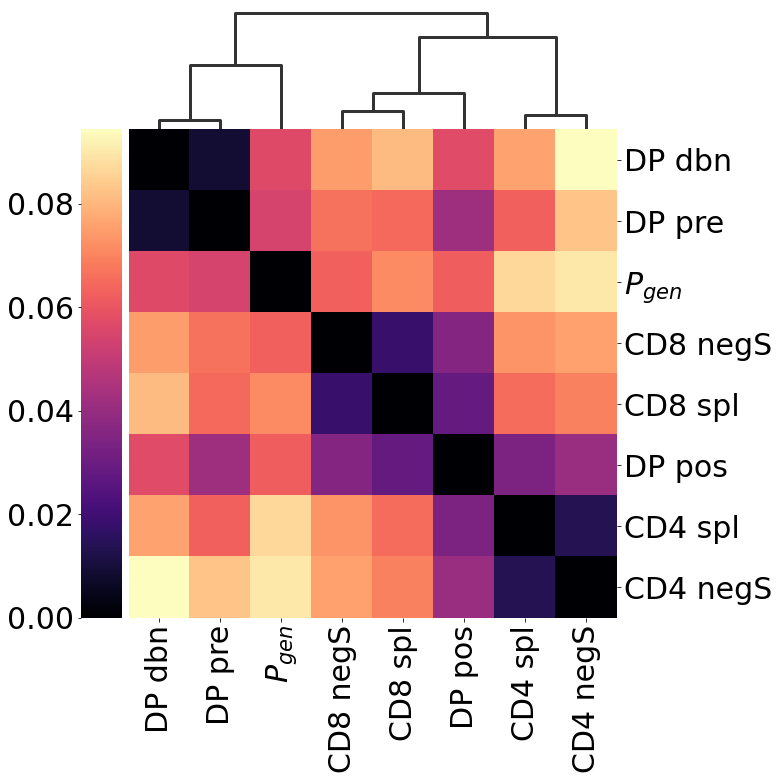

In [5]:
my_df = pd.read_csv( f"{DataPath}/CA-JSD-pstage-table.csv", index_col=0 ) 
figsize=(1+len(my_df),1+len(my_df))
Dendrogram( my_df, cmap=matplotlib.cm.magma, method='ward', figsize=figsize )

plt.savefig(f"{OutPath}/fig4D.pdf", bbox_inches='tight', dpi=300)